# Linear Regression (Pytorch)

In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 设置seed
seed=123
np.random.seed(seed)
torch.manual_seed(seed)

## Data: Inputs & Labels

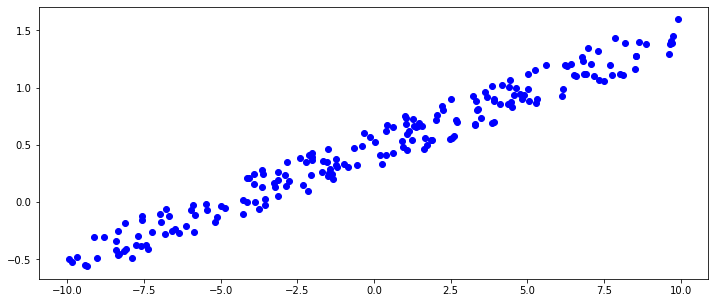

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.uniform(0, 0.35, n)
    y = (m * x + b) + noise
    return x.astype(np.float32), y.astype(np.float32)

x, y = generate_data()
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.scatter(x, y, c="b", label="samples")

## Linear Regression Model with Pytorch

In [8]:
class LinearRegressionPTHCustomize(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.Tensor(1, 1).uniform_(-.1, .1))
        self.b = nn.Parameter(torch.Tensor(1).uniform_(-.1, .1))
    
    def forward(self, x):
        return x @ self.w + self.b

In [9]:
class LinearRegressionPTH(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)
    

## Train the Model

In [10]:
lr = 0.01
eps= 10

In [11]:
torch_model = LinearRegressionPTH()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(torch_model.parameter(), lr=lr)

for epoch in range(eps):
    y_pred = torch_model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss {loss.data}")

AttributeError: 'LinearRegressionPTH' object has no attribute 'parameter'

## Results

In [ ]:
[w_torch, b_torch] = torch_model.parameters()


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
ax.scatter(x, y, c="b", label="samples")
ax.plot(x, w_torch*x+b_torch, "c", linewidth=3.0, label="pytorch")
ax.legend()
plt.xlabel("x")
plt.ylabel("y")